**1. Embedding층의 가중치 행렬 $W_{\rm in}$, 입력되는 단어 id의 배치 묶음 $X$, 은닉층에서 흘러들어오는 미분 $\partial L \over \partial h$이 각각
$$
W_{\rm in}=\begin{pmatrix} 1&2&3 \\ 4&5&6 \\ 7&8&9 \\ 10&11&12 \end{pmatrix}, \qquad X=[2,0,3,0], \qquad {\partial L \over \partial h} = \begin{pmatrix} 0&1&1 \\ 1&0&1 \\ 1&1&0 \\ 1&1&1 \end{pmatrix}
$$
이다.**
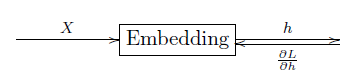

**(i) Emedding층 방법으로 출력값 $h$와 가중치 행렬에 대한 미분 $\partial L \over \partial W_{\rm in}$을 각각 계산하시오.**

id 묶음이 순전파는 뽑아내는 행의 위치를, 역전파는 집어넣는 행의 위치를 말해줍니다.  
가중치 행렬 $W_{\rm in}$에서 2행, 0행, 3행, 0행을 뽑아내서 차례대로 행에 넣어 출력값
$$
h =
\begin{pmatrix}
7&8&9\\
1&2&3\\
10&11&12\\
1&2&3
\end{pmatrix}
$$
을 얻습니다.  
흘러들어오는 미분 $\partial L \over \partial h$에서 차례대로 행을 뽑아 2행, 0행, 3행, 0행에 넣어
$$
{\partial L \over \partial W_{\rm in}}
=
\begin{pmatrix}
2&1&2\\
0&0&0\\
0&1&1\\
1&1&0
\end{pmatrix}
$$
을 얻습니다.  
주의할 점은 $[1,0,1]$과 $[1,1,1]$은 0행에 중복해서 들어가게 되는데 더해서 $[2,1,2]$가 되고 아무것도 들어가지 않는 1행은 $[0,0,0]$이 된다는 점입니다.

**(ii) 행렬곱층 계산 그래프로  검산하시오.**

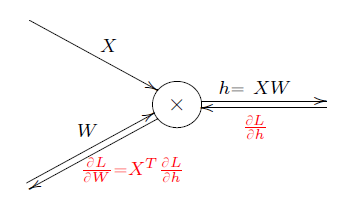

순전파는
$$
h = X W_{\rm in} =
\begin{pmatrix} 0&0&1&0 \\ 1&0&0&0 \\ 0&0&0&1 \\ 1&0&0&0 \end{pmatrix}
\begin{pmatrix} 1&2&3 \\ 4&5&6 \\ 7&8&9 \\ 10&11&12 \end{pmatrix}
=
\begin{pmatrix}
7&8&9\\
1&2&3\\
10&11&12\\
1&2&3
\end{pmatrix}
$$
이고 역전파는
$$
{\partial L \over \partial W_{\rm in}} =
X^T {\partial L \over \partial h} =
\begin{pmatrix} 0&1&0&1 \\ 0&0&0&0 \\ 1&0&0&0 \\ 0&0&1&0 \end{pmatrix}
\begin{pmatrix} 0&1&1 \\ 1&0&1 \\ 1&1&0 \\ 1&1&1 \end{pmatrix}
=
\begin{pmatrix}
2&1&2\\
0&0&0\\
0&1&1\\
1&1&0
\end{pmatrix}
$$
입니다.  
위의 Embedding층 계산결과와 동일한 결과가 나왔네요.

**(iii) layers.py안의 Embedding 클래스로 인스턴스를 만들어서 검산하시오.**

In [1]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch 2') # 각자의 경로로 수정해주세요.
import numpy as np
from common.layers import Embedding

W_in = np.arange(1,13).reshape(4,3)
idx = np.array([2,0,3,0])
dh = np.array([[0,1,1],[1,0,1],[1,1,0],[1,1,1]])

Emb = Embedding(W_in)
print(Emb.forward(idx))

Emb.backward(dh)
print(Emb.grads[0])

[[ 7  8  9]
 [ 1  2  3]
 [10 11 12]
 [ 1  2  3]]
[[2 1 2]
 [0 0 0]
 [0 1 1]
 [1 1 0]]


**2. Embedding dot층의 가중치 행렬 $W_{\rm out}$, 입력되는 은닉 벡터의 배치 묶음 $h$, 위에서 흘러들어오는 미분 $\partial L \over \partial s$, 타겟 단어 id의 배치 묶음 $t$가 각각
$$
W_{\rm out}=\begin{pmatrix} 1&2&3&4 \\ 5&6&7&8 \\ 9&10&11&12 \end{pmatrix}, \qquad h=\begin{pmatrix} 0&-1&1 \\-1&0&1\\-1&-1&1 \end{pmatrix}, \qquad {\partial L \over \partial s} = [1,2,3], \qquad t=[2,0,0]
$$
이다.**
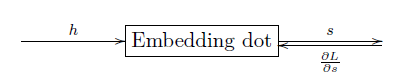

**(i) 출력되는 스코어 $s$를 구하시오. (PPT 7 페이지)**

라벨이 $[2,0,0]$이므로 은닉벡터들과 가중치 행렬의 2열, 0열, 0열을 차례로 내적하면
$$
[0,-1,1]\circ[3,7,11]=4, \qquad [-1,0,1]\circ[1,5,9]=8, \qquad [-1,-1,1]\circ [1,5,9]=3
$$
을 얻습니다.  
모으면 스코어는
$$
s=[4,8,3]
$$
이네요.

**(ii) $W_{\rm out}$을 transpose하고 Embedding층을 거쳐 $W$를 구하시오. (PPT 8페이지)**

Embedding dot층에서는 가중치 행렬에서 열을 뽑아 내는 반면에 Embedding 클래스는 행을 뽑아냅니다.  
Embedding 클래스를 사용하기 위해서는 $W_{\rm out}$을 transpose해야 합니다.  
$W_{\rm out}^{\rm T}$에서 행을 뽑아내는 작업이 $W_{\rm out}$ 입장에서는 열을 뽑아내는 작업이기 때문이지요.  
가중치 행렬을 transpose하면
$$
W_{\rm out}^T=
\begin{pmatrix}
1&5&9\\
2&6&10\\
3&7&11\\
4&8&12
\end{pmatrix}
$$
입니다.  
Embedding층에서는 라벨이 $[2,0,0]$이므로 2행, 0행, 0행을 뽑아서 새로운 행렬
$$
W =
\begin{pmatrix}
3&7&11\\
1&5&9\\
1&5&9
\end{pmatrix}
$$
을 만듭니다.

**(iii) 계산 그래프를 통해
$$
s, \quad {\partial L \over \partial h},\quad {\partial L \over \partial W}
$$
을 구하시오. (PPT 8, 9페이지)**

Embedding dot층의 계산 그래프는 다음과 같습니다.  
${\partial L \over \partial s}$은 열벡터입니다.  
$*$는 스칼라 곱이고 $\circ$는 내적인데 흘러들어온 배치묶음에 대해 행별로 독립적으로 연산합니다.
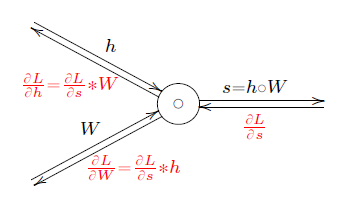

순전파는
$$
s = h\circ W =
\begin{pmatrix} 0&-1&1 \\-1&0&1\\-1&-1&1 \end{pmatrix}
\circ
\begin{pmatrix}
3&7&11\\
1&5&9\\
1&5&9
\end{pmatrix}
=
\begin{pmatrix}
[0,-1,1]\circ[3,7,11]\\
[-1,0,1]\circ[1,5,9]\\
[-1,-1,1]\circ[1,5,9]
\end{pmatrix}
=
\begin{pmatrix}
4\\
8\\
3
\end{pmatrix}
$$
이고 역전파는
$$
{\partial L \over \partial h}={\partial L \over \partial s}*W=
\begin{pmatrix}1\\2\\3\end{pmatrix}
*
\begin{pmatrix}
3&7&11\\
1&5&9\\
1&5&9
\end{pmatrix}
=
\begin{pmatrix}
1*[3,7,11]\\
2*[1,5,9]\\
3*[1,5,9]
\end{pmatrix}
=
\begin{pmatrix}
3&7&11\\
2&10&18\\
3&15&27
\end{pmatrix},
$$
와
$$
{\partial L \over \partial W}={\partial L \over \partial s}*h=
\begin{pmatrix}1\\2\\3\end{pmatrix}
*
\begin{pmatrix} 0&-1&1 \\-1&0&1\\-1&-1&1 \end{pmatrix}
=
\begin{pmatrix}
1*[0,-1,1]\\
2*[-1,0,1]\\
3*[-1,-1,1]
\end{pmatrix}
=
\begin{pmatrix} 0&-1&1 \\-2&0&2\\-3&-3&3 \end{pmatrix}
$$
입니다.

**(iv) $\partial L \over \partial W$을 embedding층 역전파를 한후 transpose를 해서 $\partial L \over \partial W_{\rm out}$을 구하시오.**

앞에서 $W$에 transpose를 한 후 embedding층을 통과시켜 $W_{\rm out}$을 얻었습니다.  
따라서, 역전파는 거꾸로 embedding층의 역전파를 먼저 하고 transpose의 역전파를 해야 합니다.  
그런데 transpose는 재배열이기 때문에 역전파는 역재별인데 transpose의 역재배열은 transpose입니다.  
다시말해, tranpose의 역전파는 transpose입니다.

흘러들어오는 미분 $\partial L \over \partial W$에서 차례대로 행을 뽑아 2행, 0행, 0행에 넣어
$$
{\partial L \over \partial W_{\rm in}}
=
\begin{pmatrix}
-5&-3&5\\
0&0&0\\
0&-1&1\\
0&0&0
\end{pmatrix}
$$
을 얻습니다.  
여기서 주의할 점은 $[-2,0,2]$와 $[-3,-3,3]$은 0행에 중복해서 들어가게 되는데 더해서 $[-5,-3,5]$가 되고 아무것도 안들어 오는 1행과 3행은 $[0,0,0]$이 된다는 점입니다.

transpose를 하면
$$
\begin{pmatrix}
-5&0&0&0\\
-3&0&-1&0\\
5&0&1&0
\end{pmatrix}
$$
을 얻습니다.

**(v) negative_sampling_layer.py안의 EmbeddingDot 클래스로 인스턴스를 만들어서 검산하시오.**

In [2]:
from ch04.negative_sampling_layer import EmbeddingDot

W_out = np.arange(1,13).reshape(3,4)
h = np.array([[0,-1,1],[-1,0,1],[-1,-1,1]])
ds = np.array([1,2,3])
t = np.array([2,0,0])

ED = EmbeddingDot(W_out.T)

print(ED.forward(h,t))
print(ED.backward(ds))
print(ED.grads[0])

[4 8 3]
[[ 3  7 11]
 [ 2 10 18]
 [ 3 15 27]]
[[-5 -3  5]
 [ 0  0  0]
 [ 0 -1  1]
 [ 0  0  0]]


**3. 행렬곱층과 Embedding층의 속도가 몇배 차이가 나는지 다음과 같은 코드를 작성하여 확인하시오.**

**- 말뭉치는 PTB 데이터셋 사용**

**- 행은 PTB 데이터셋의 어휘수, 열은 100개인 가중치 행렬을 표준정규분포를 따라 랜덤하게 생성**

**- MatMul 클래스와 Embedding 클래스로 인스턴스 생성**

**- time 라이브러리를 사용하여 앞 100,000개 단어의 묶음에 대하여 두 인스턴스의 순전파 속도 산출**

In [3]:
import time
from common.util import convert_one_hot
from common.layers import MatMul, Embedding
from dataset import ptb

hidden_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)

corpus=corpus[:100000]

corpus_one_hot=convert_one_hot(corpus,vocab_size)

W=np.random.randn(vocab_size,hidden_size)
matmul=MatMul(W)
embedding=Embedding(W)

start = time.time()
matmul.forward(corpus_one_hot)
print('행렬곱층 : ' + str(time.time() - start))

start = time.time()
embedding.forward(corpus)
print('임베딩층 : ' + str(time.time() - start))

행렬곱층 : 5.881346702575684
임베딩층 : 0.04687976837158203
